<a href="https://colab.research.google.com/github/geomwangi007/Machine-Learning-Projects/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Telecom Customer Churn Prediction:**

    




# Introduction


The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

The dataset can be classified into 3 groups:

(1) **Demographic Information**

*    gender: Whether the client is a female or a male (Female, Male).
*    SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
*    Partner: Whether the client has a partner or not (Yes, No).
*    Dependents: Whether the client has dependents or not (Yes, No).

(2) **Customer Account Information**

*    tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
*    Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
*    PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
*    PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
*    MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
*    TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) **Services Information**

*    PhoneService: Whether the client has a phone service or not (Yes, No).
MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
*    InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
*    OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
*    OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
*    DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
*    TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
*    StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
*    StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

## Objective:
To predict how likely a customer will churn by analyzing his/her characteristics:

*  demographic information
*  account information

*  services information


  The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.

**Steps of the project
The project consists of the following sections:**

*  Data Reading
*  Exploratory Data Analysis and Data Cleaning
* Data Visualization  
* Feature Importance






# Data Importing

**1. Libraries  and data importing**

In [107]:
#Installing kaggle using pip
!pip install kaggle


In [7]:
#Moving the json file to the right dir:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
# Downloading the Dataset from Kaggle

!kaggle datasets download -d puja19/telcom-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 52.6MB/s]


In [10]:
 #Extracting contents of the zip file to the current directory by unzipping the dataset.

!unzip telcom-customer-churn.zip

Archive:  telcom-customer-churn.zip
replace Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [11]:
# Importing neccessary packages
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [121]:
# import telecom dataset into a pandas data frame

data = pd.read_csv('Telco-Customer-Churn.csv')



In [122]:
#Printing the first five rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From analysis the dataset, we notice that some of the independent features are in numerical and most of feature are in categorical feature. Seperate into numerical and categorical data for EDA parts

In [124]:
#Checking the columns in the dataset
column_names = data.columns
column_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [125]:
# Total charges are in object dtype so, convert into Numerical feature
data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

print(data.dtypes)



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [126]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the  Total Charges column. Let us replace them with the median value.

In [127]:
# replace NaN values with mean value
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median())


In [128]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [129]:
#Dropping the customerID
data = data.drop(columns = 'customerID', axis = 1)

In [119]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Summary



*   A relatively small percentage (16%) of customers are seniors (mean: 0.16).

*   Average customer tenure is around 32.42 months, with a broad range (min: 1, max: 72).

*   The average monthly charge is $64.76, with a wide range (min: $18.25, max: $118.75).

*    The churn rate is approximately 27%, indicating a significant proportion of customers discontinuing the service.

*    The average Total charges is 2283.30 with the minimum total charge at 18.80 and the maximum at 8684.80.






## Numerical and Categorical variables

Graphical representaion of the distributions of all variables, both numerical and categorical.

********************************************************************************************************
Subplots for categorical variables
********************************************************************************************************


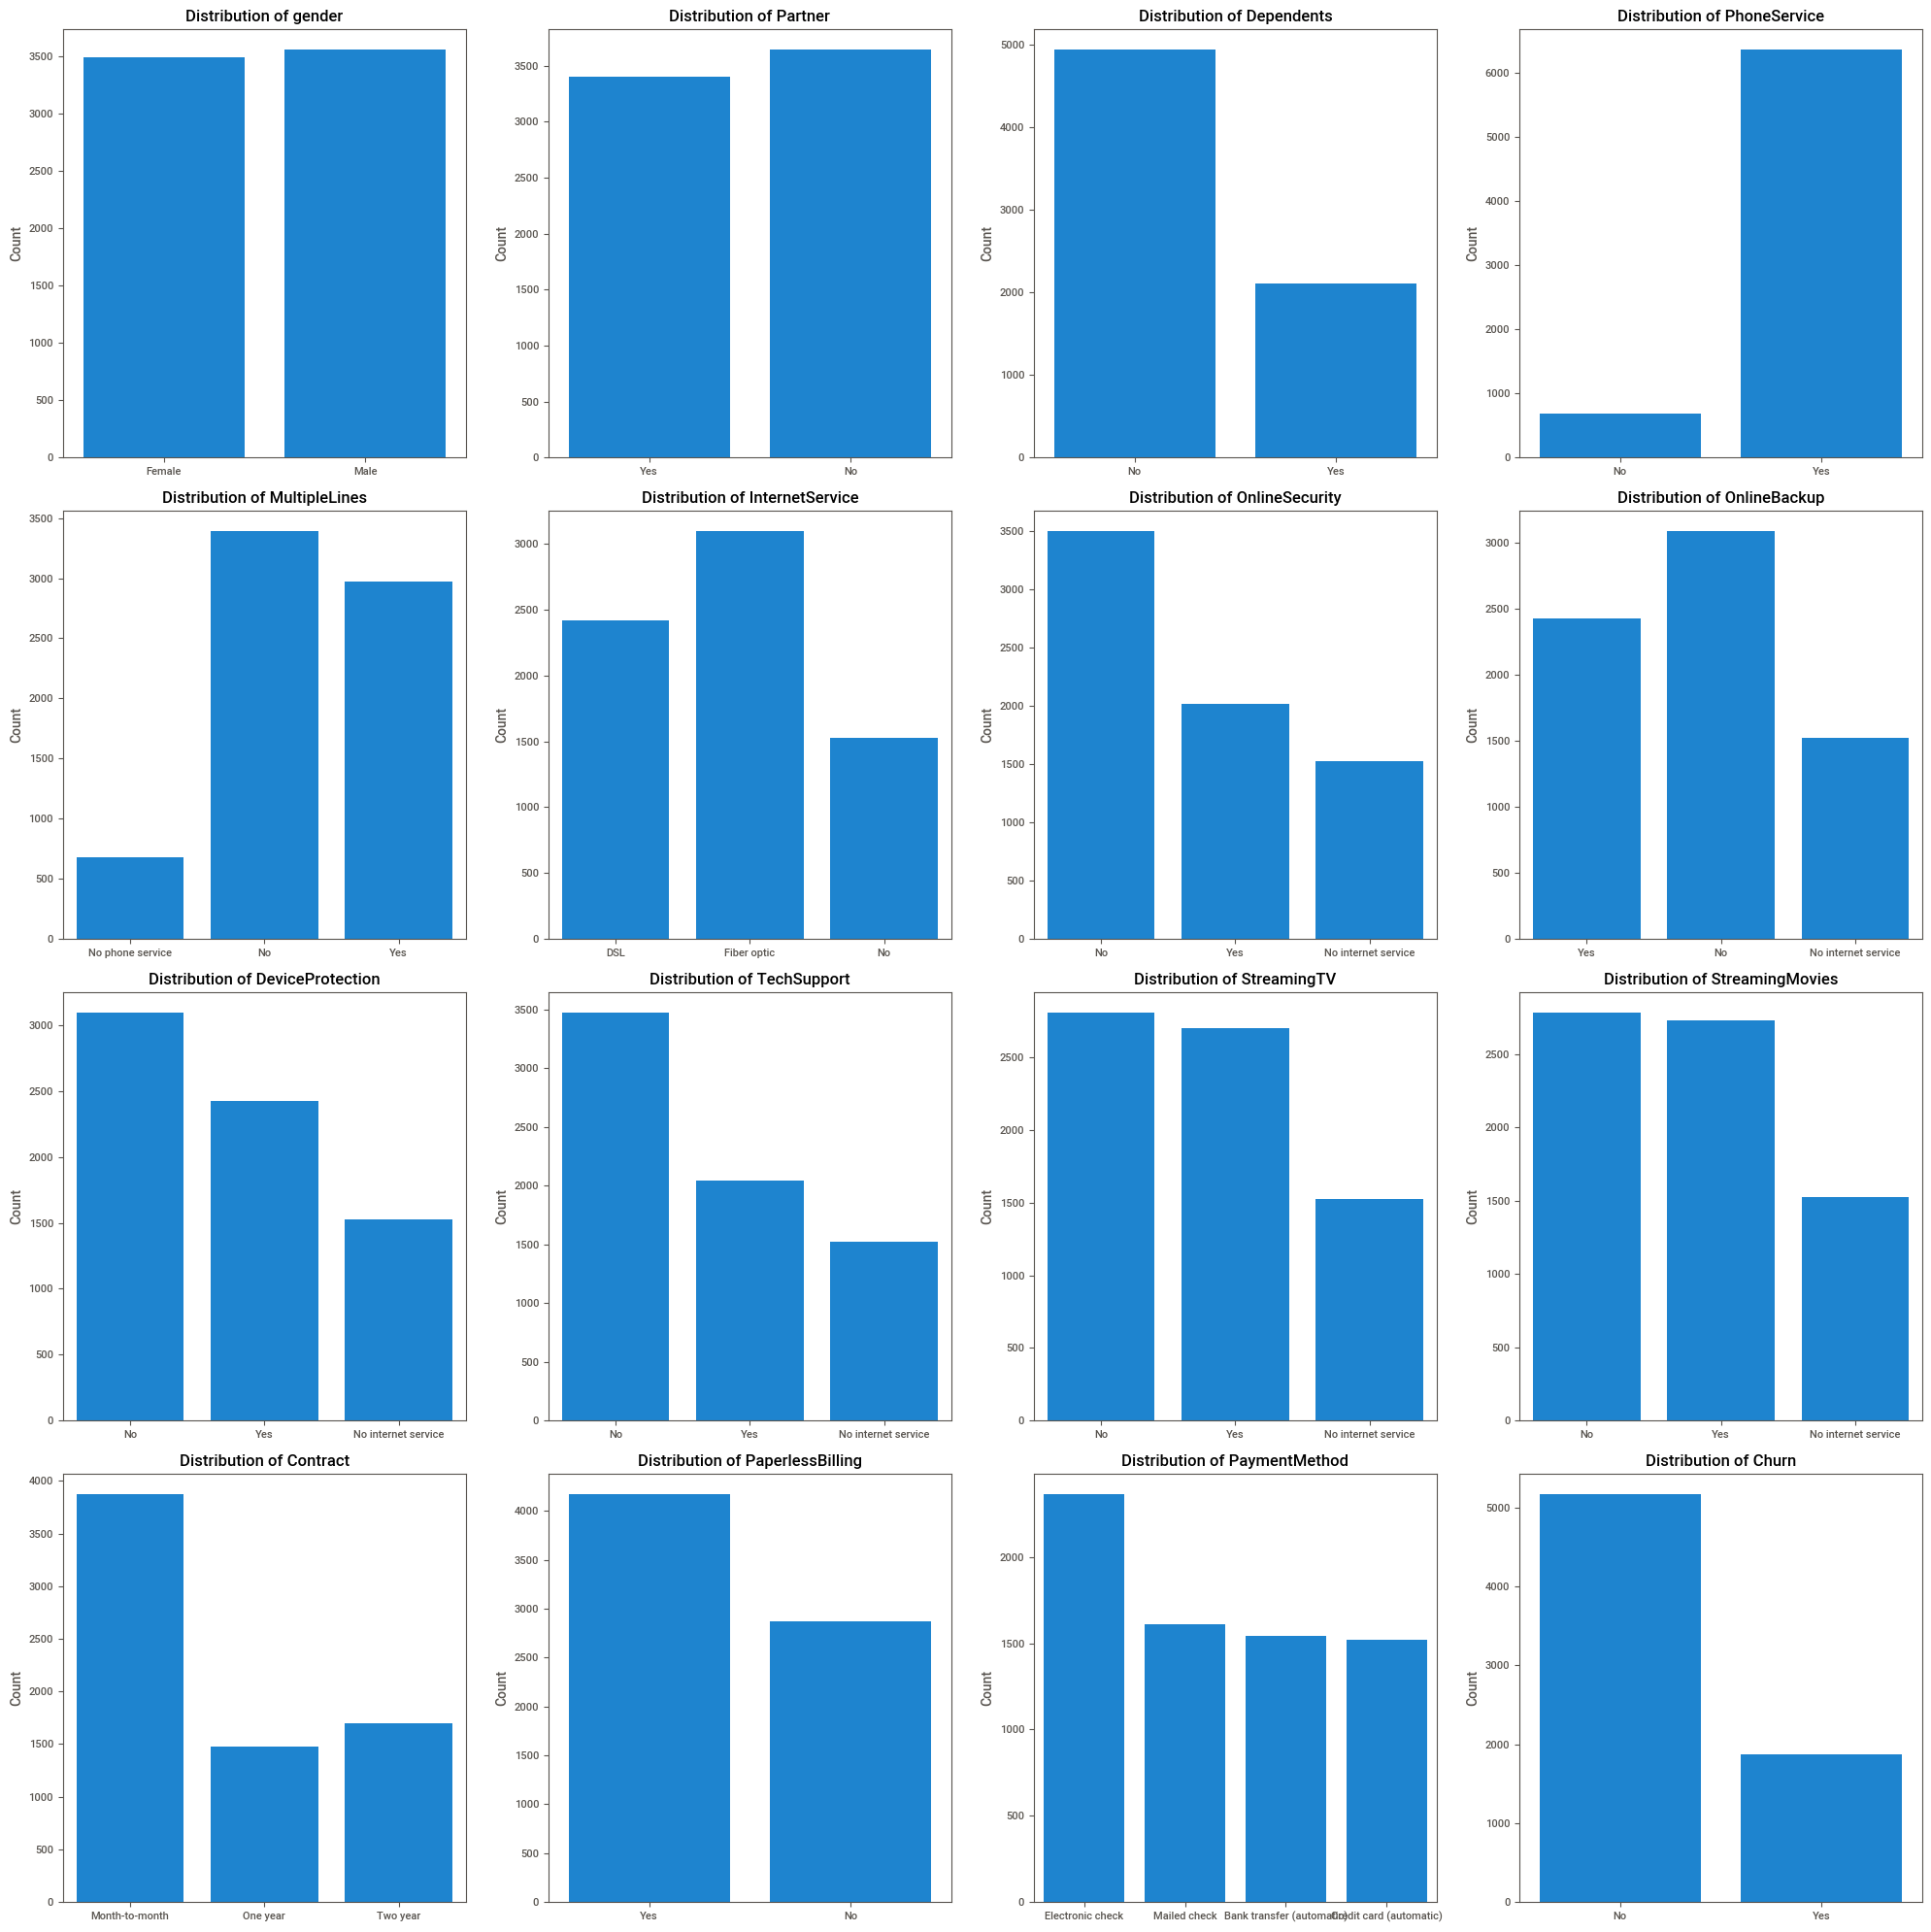

********************************************************************************************************
Subplots for numerical variables
********************************************************************************************************


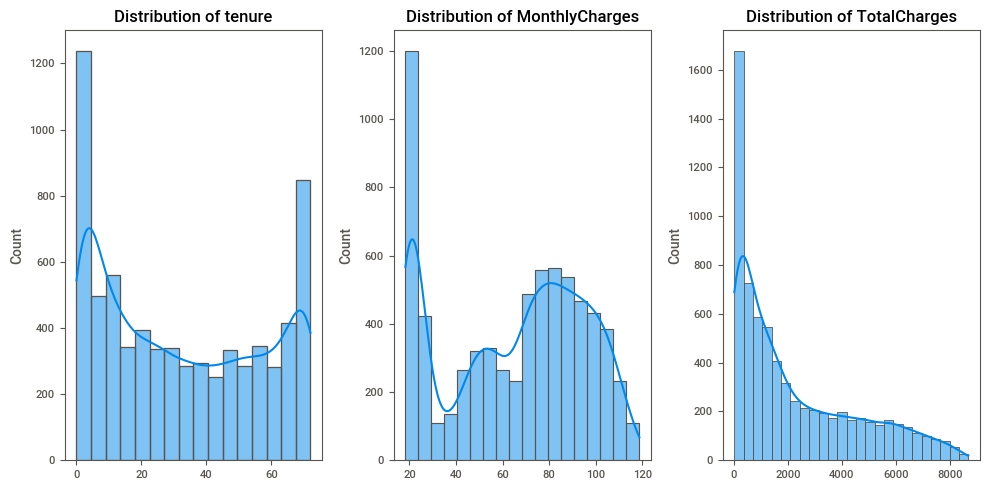

In [130]:
print('********************************************************************************************************')
print('Subplots for categorical variables')
print('********************************************************************************************************')
# Categorical variables
categorical_variables = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Numerical variables
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Subplots for categorical variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(categorical_variables):
    sns.countplot(data=data, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjusting layout for categorical variables
plt.tight_layout()
plt.show()

print('********************************************************************************************************')
print('Subplots for numerical variables')
print('********************************************************************************************************')

# Subplots for numerical variables
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_variables), figsize=(10, 5))

# Handling one numerical variable separately
if len(numerical_variables) == 1:
    sns.histplot(data=data, x=numerical_variables[0], kde=True, ax=axes)
    axes.set_title(f'Distribution of {numerical_variables[0]}')
    axes.set_xlabel('')
    axes.set_ylabel('Count')
else:
    axes = axes.flatten()
    for i, var in enumerate(numerical_variables):
        sns.histplot(data=data, x=var, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

# Adjusting layout for numerical variables
plt.tight_layout()
plt.show()


#Sweetviz summary

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis).

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

In [75]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


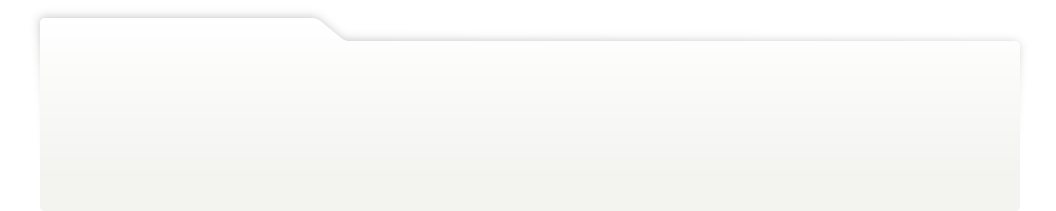
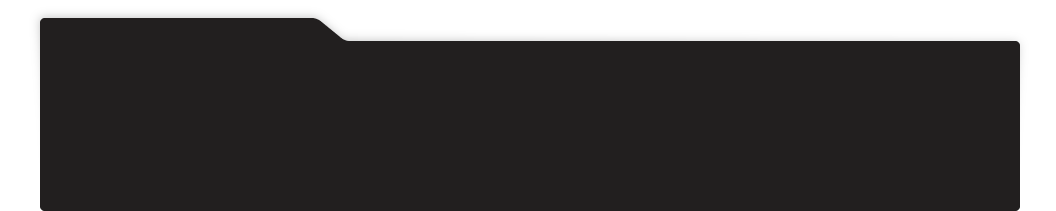
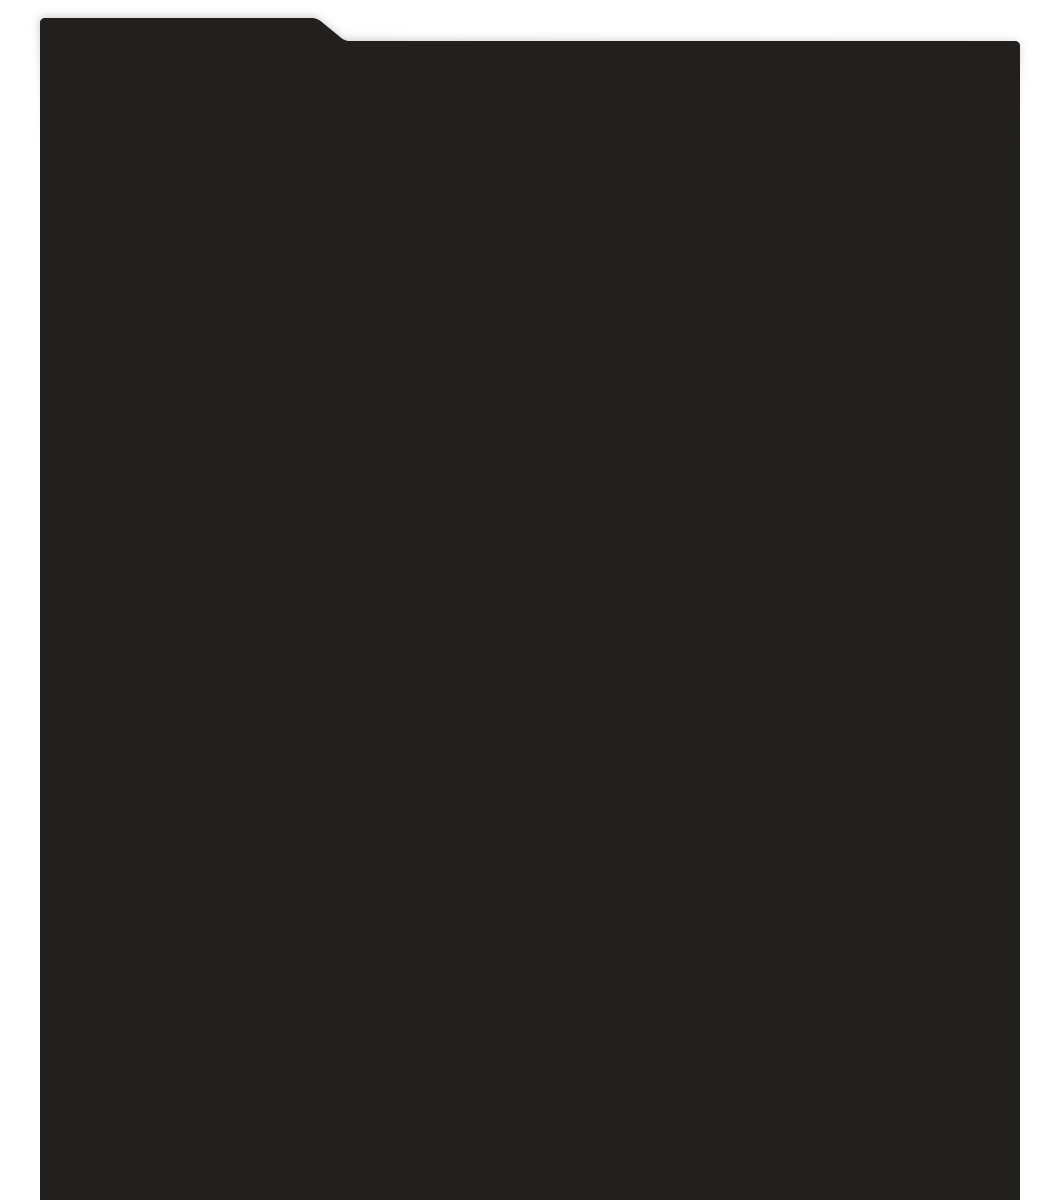
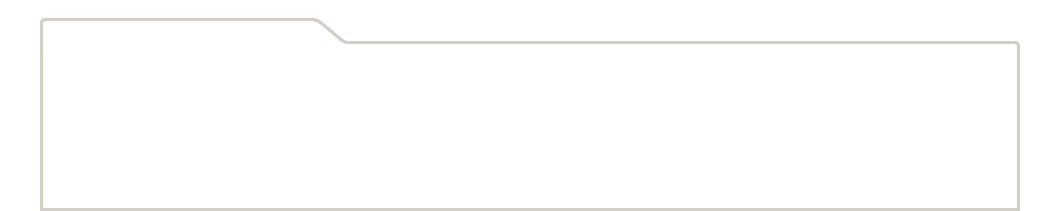
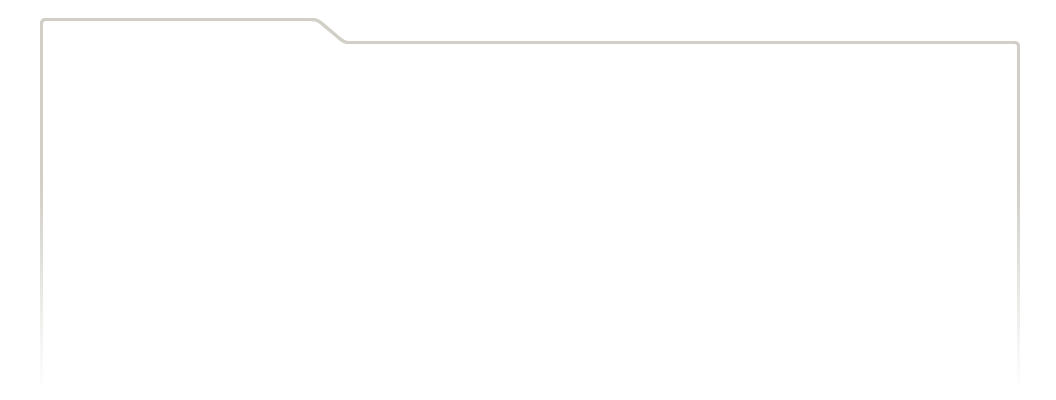
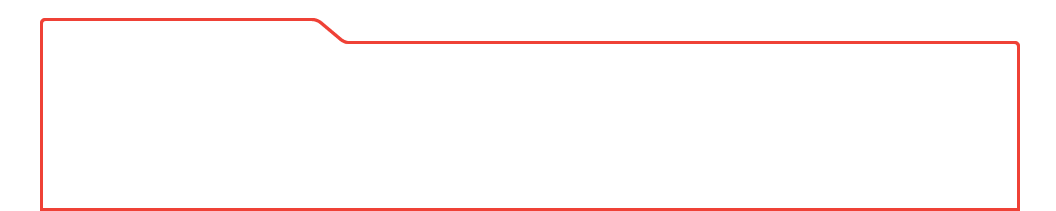
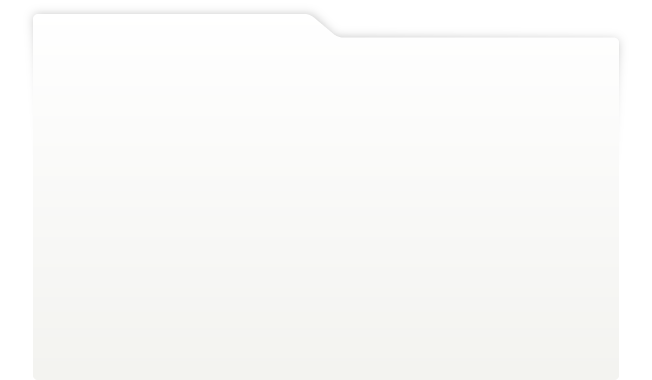
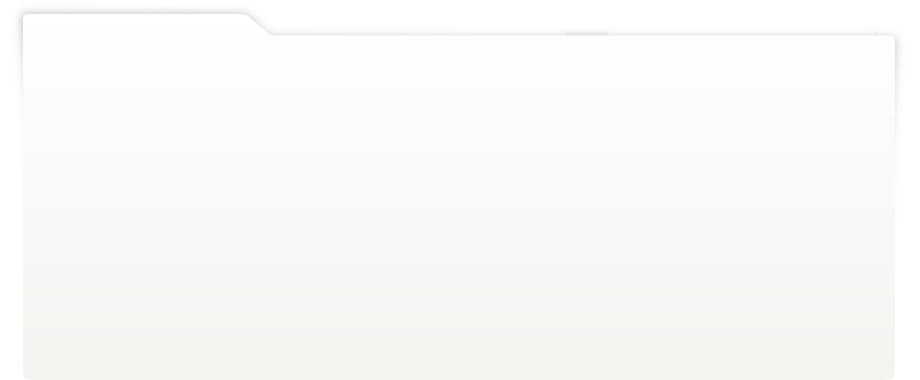
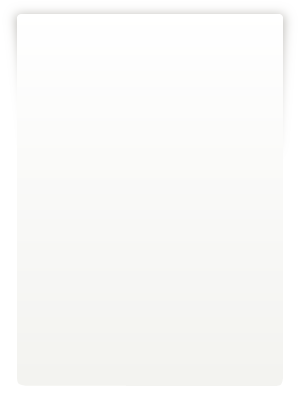
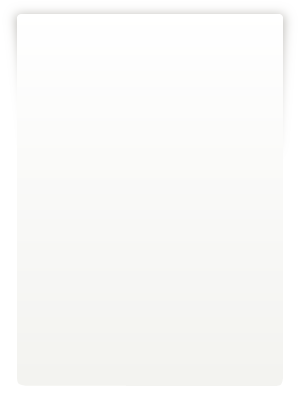
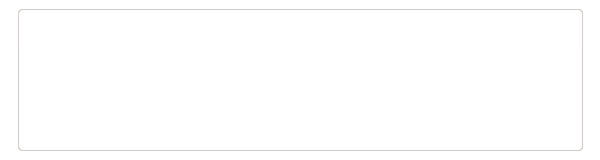
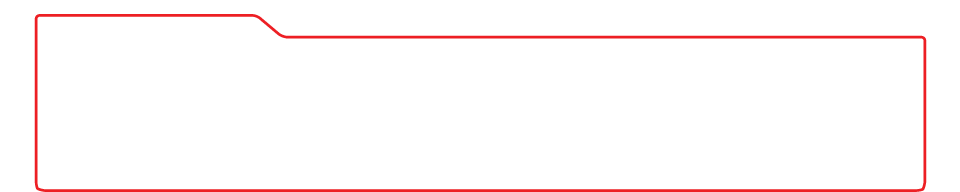
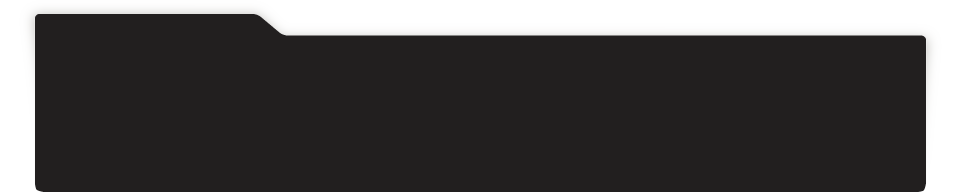
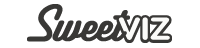
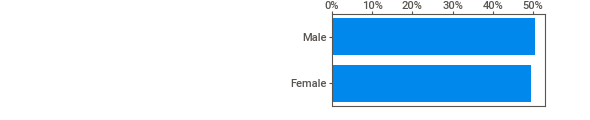
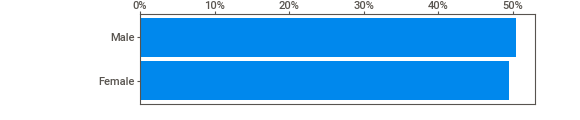
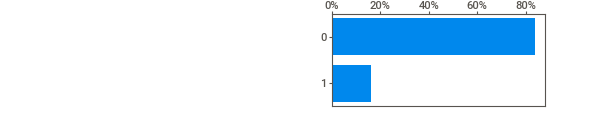
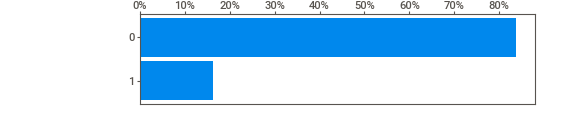
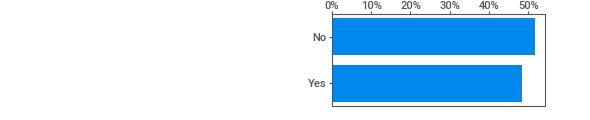
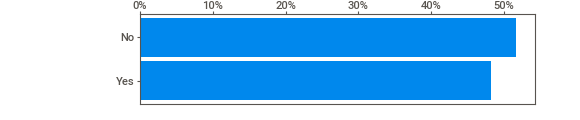
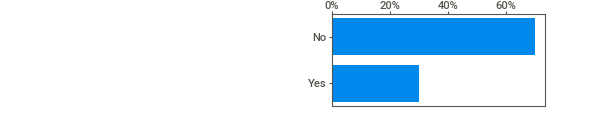
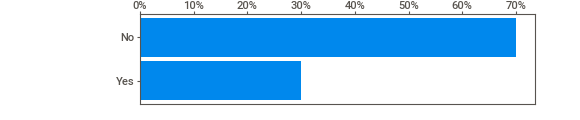
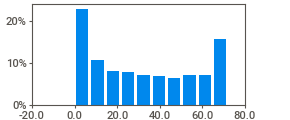
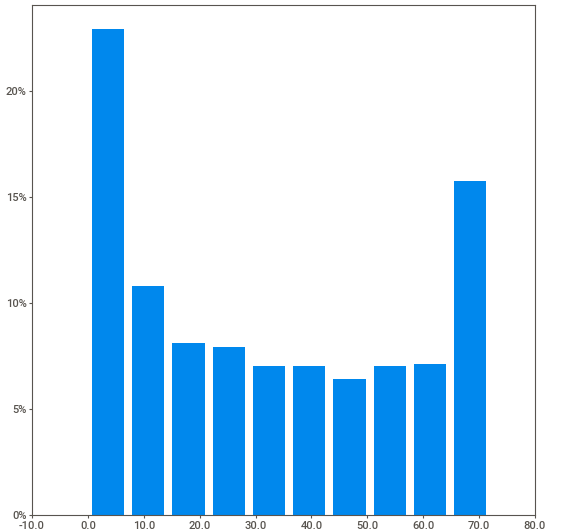
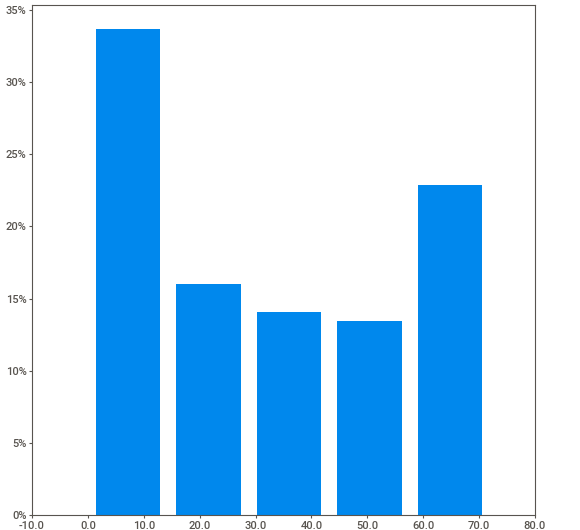
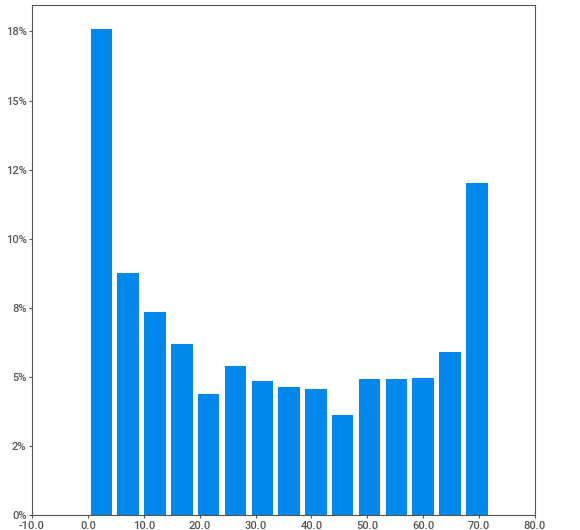
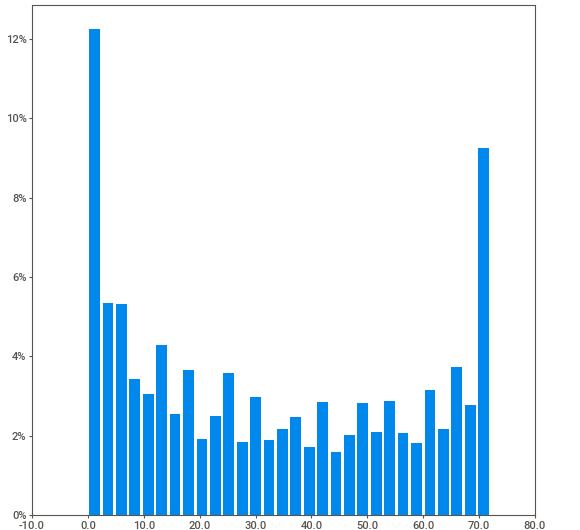
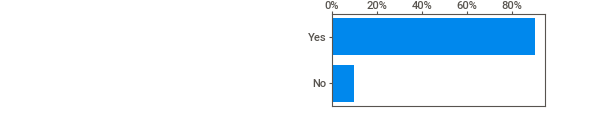
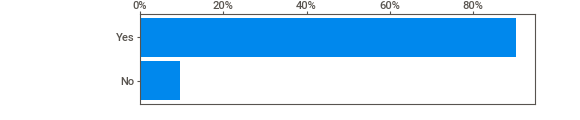
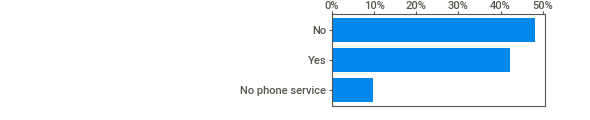
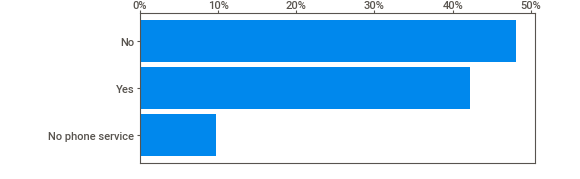
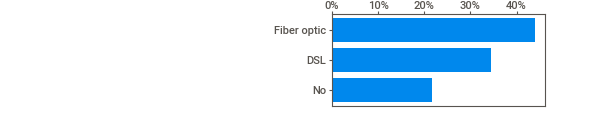
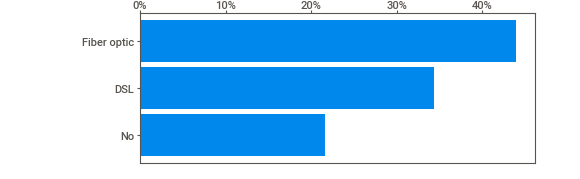
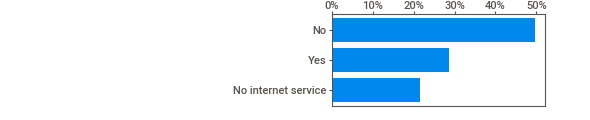
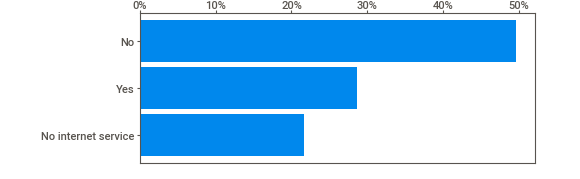
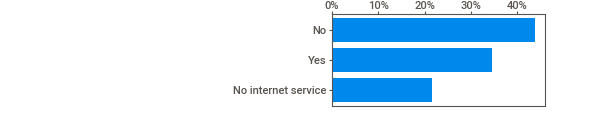
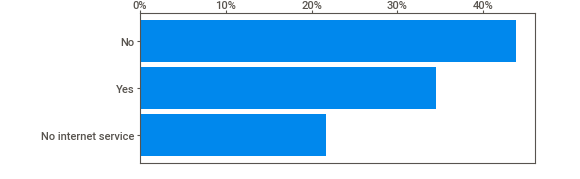
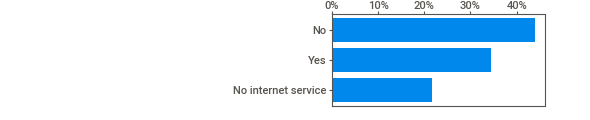
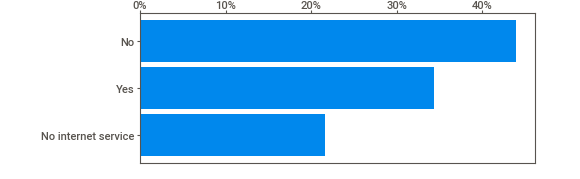
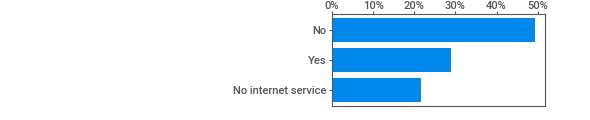
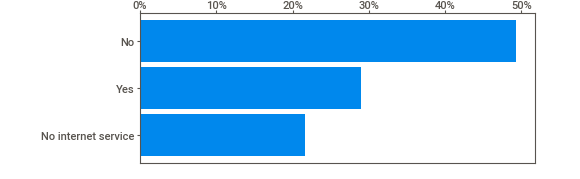
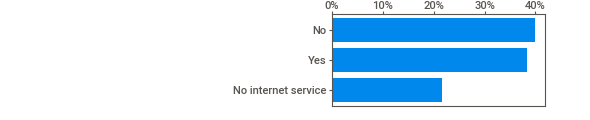
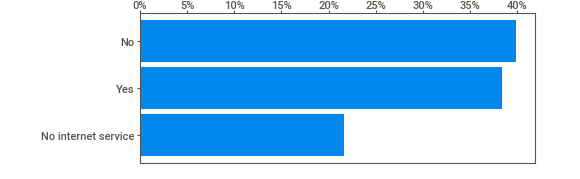
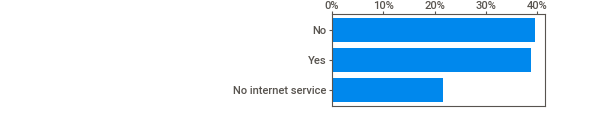
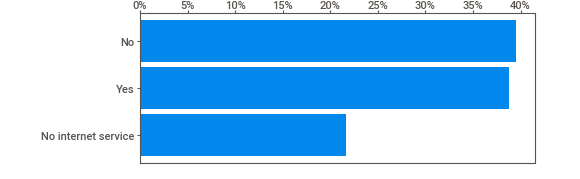
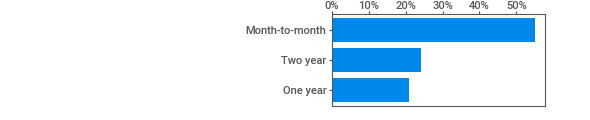
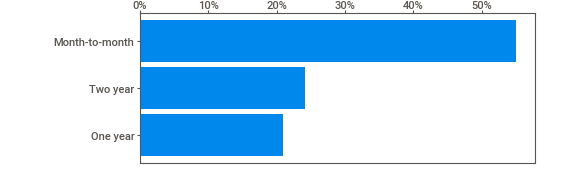
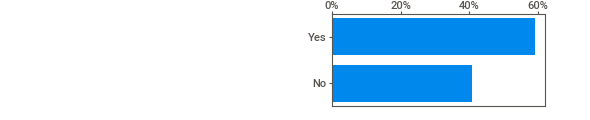
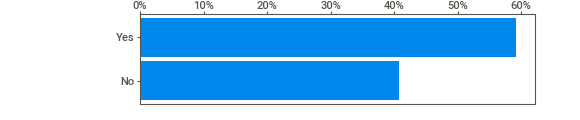
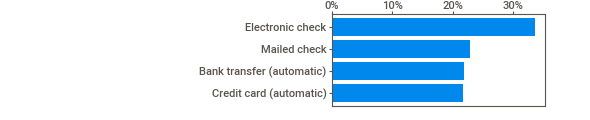
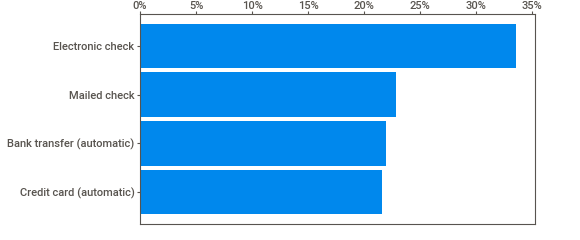
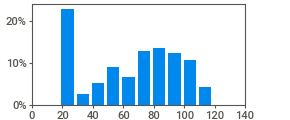
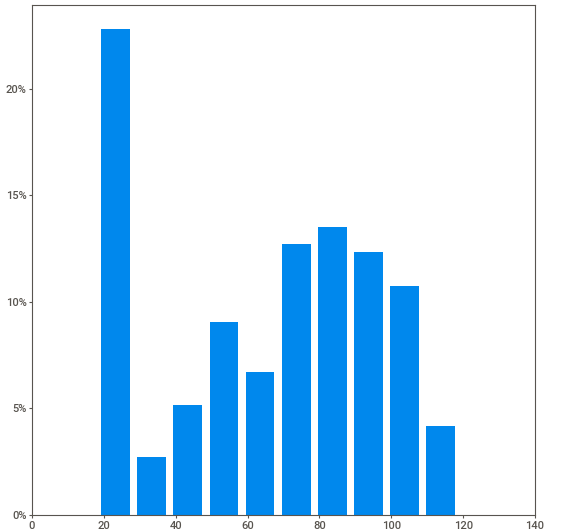
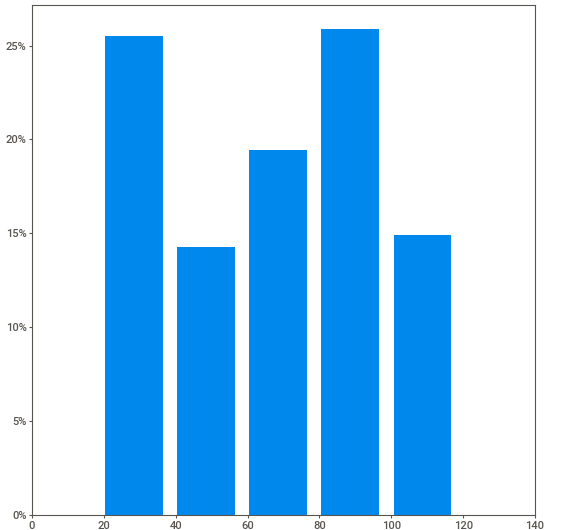
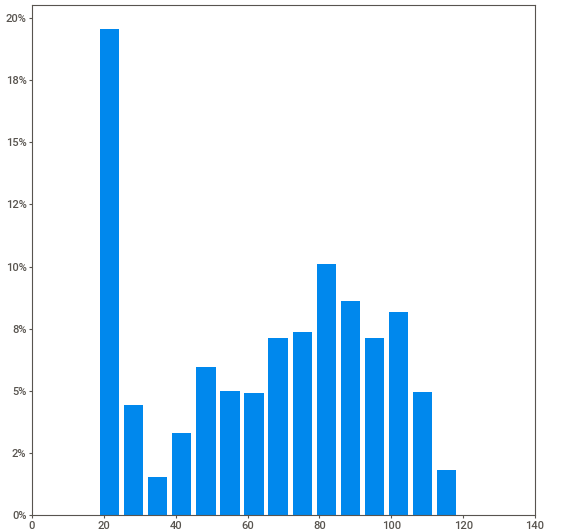
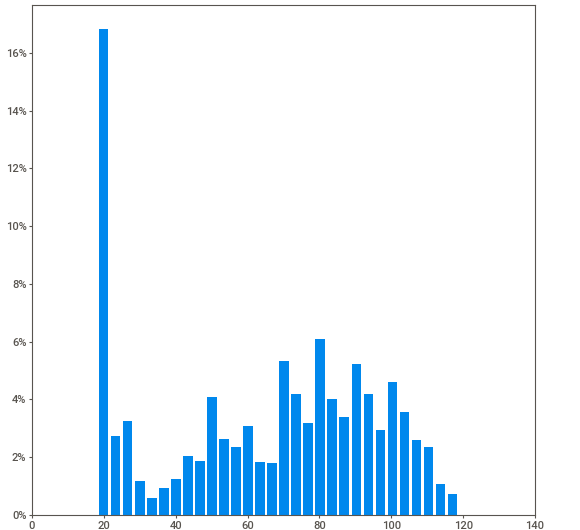
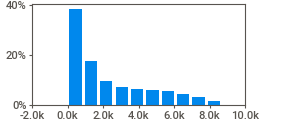
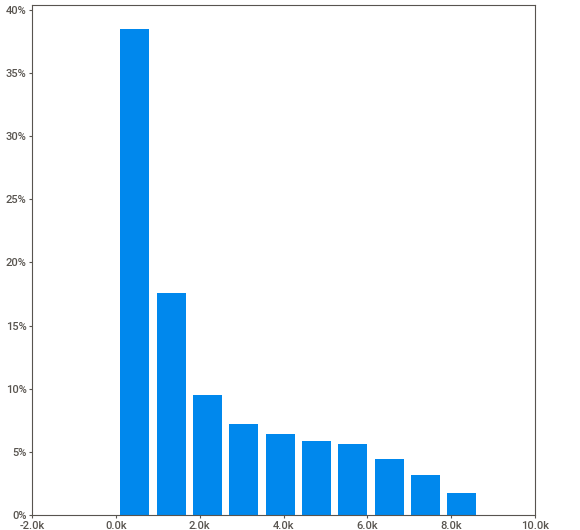
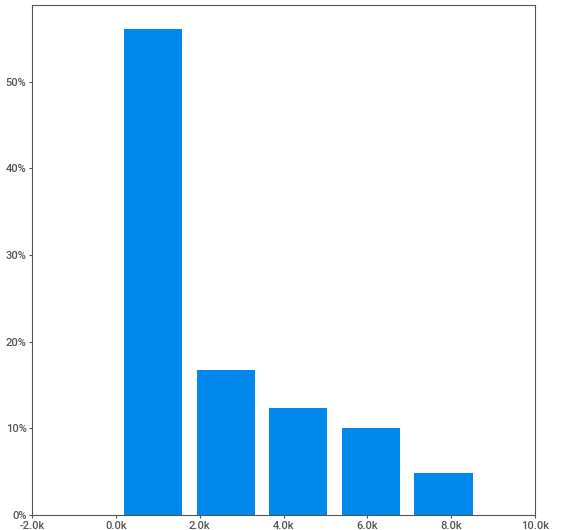
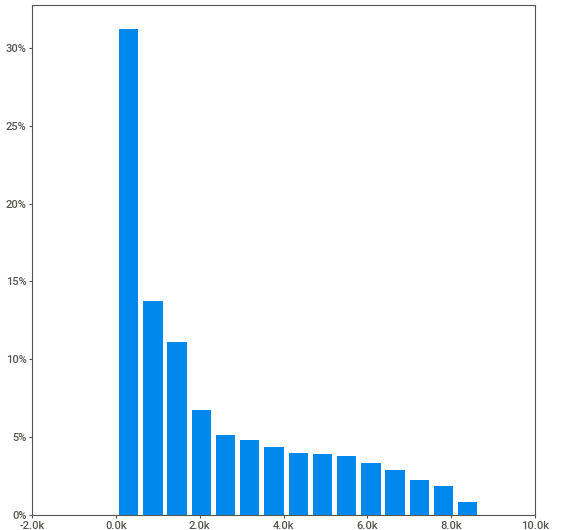
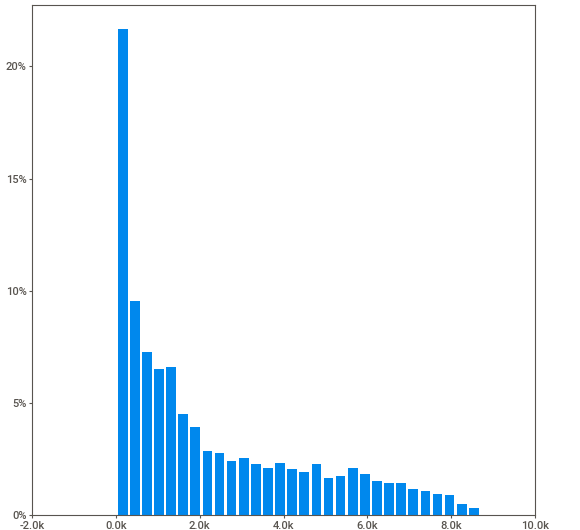
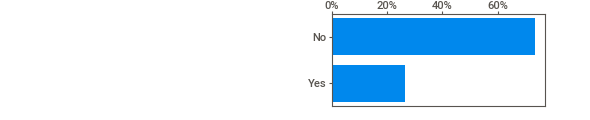
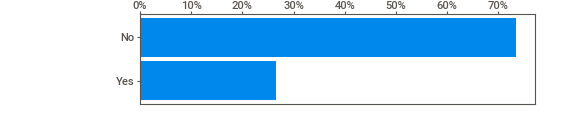
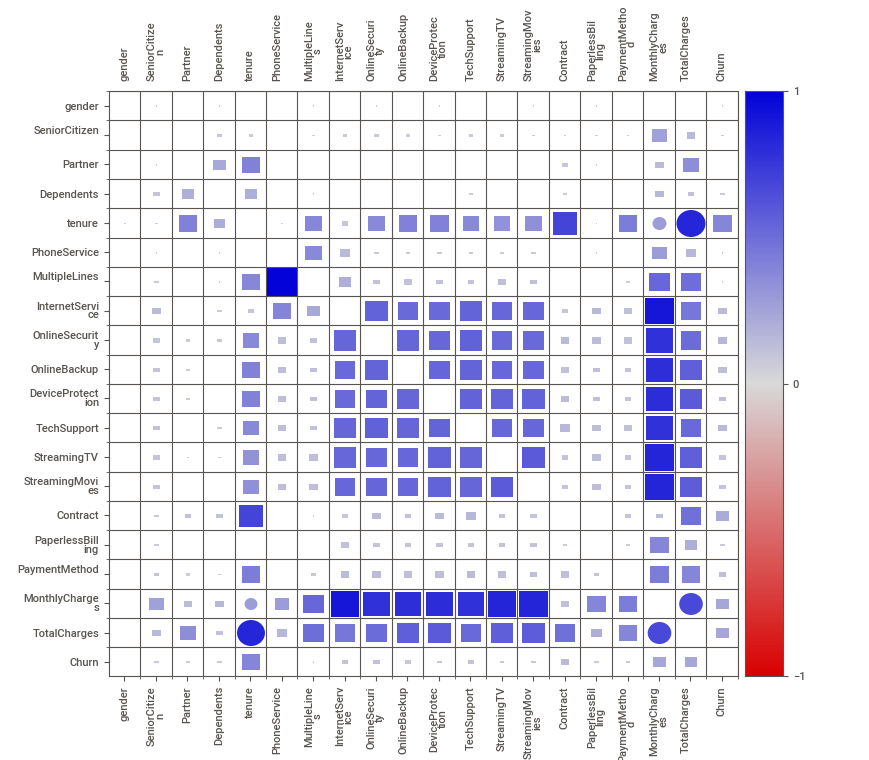
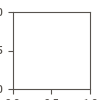

In [76]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(data)
#display the report
advert_report.show_notebook()

We can get the following from the sweetviz visualizations:
*    The dataset displays roughly equal gender distribution, with a mean of 0.5.
*    Approximately 16.2% of the customers are senior citizens this means that most of the customers in the data are younger people. .
*    Partnered customers account  who churnedfor about 48%, while those with dependents make up 30%, providing insights into family structures.
*    The average customer tenure is approximately 32.37 months.
*    The majority (90%) of customers have phone service.
*    On average, customers have 1.33 lines, with some having multiple lines.
*    About 87% of customers have internet service.
*    Various services (Online Security, Backup, Device Protection, Tech Support, Streaming) are subscribed to by a significant portion of customers (mean around 0.72 to 0.82).
*    Customers have diverse contract terms, including month-to-month, one-year, and two-year contracts.
*    Approximately 59% of customers opt for paperless billing.
*    There are diverse payment methods, with a mean of 1.32, indicating multiple methods being used.
*    The average monthly charge is 64.76, ranging from 18.25 to 118.75.
*    The churn rate is approximately 27%, suggesting a significant proportion of customers discontinue the service.

#Univariate analysis

The purpose of univariate analysis is to understand the distribution of values for a single variable.

## 1. Churn

In [77]:
#Percenage of customers who churned and did not churn
churn_percentage = (data['Churn'].value_counts(normalize=True) * 100).round(2)

print("Churn Percentage:")

print(churn_percentage)


Churn Percentage:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


Text(0, 0.5, 'Churn')

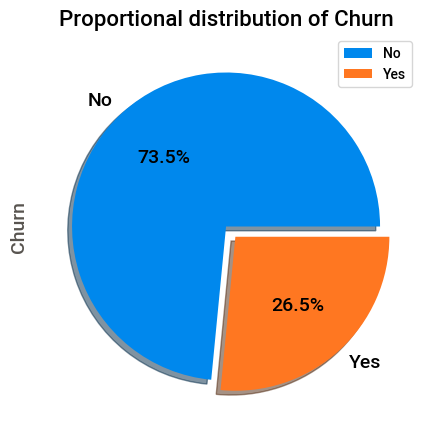

In [78]:
# Plotting the distribution of churn, the dependent variable.
data['Churn'].value_counts().plot(kind='pie', legend=True,explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, figsize=(5,5), fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

In [79]:
#Let’s see the value count of our target variable

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

 let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

### Churn vs Tenure:

i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

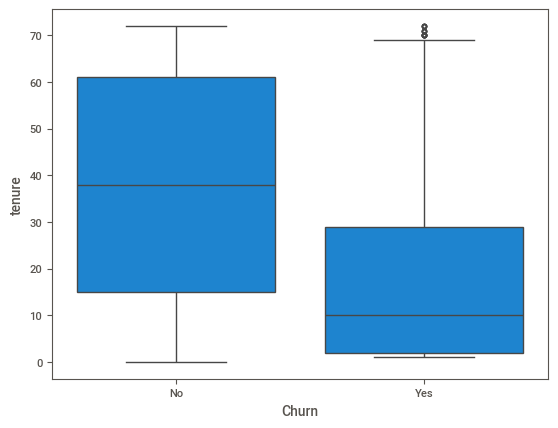

In [80]:

sns.boxplot(x = data.Churn, y = data.tenure)

###  Churn by Monthly Charges:

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

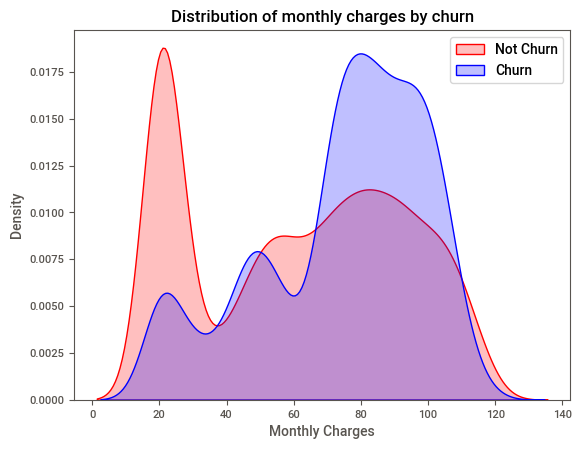

In [81]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill = True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Insight: Here it is evident that when the churn is high then the charges are high.

### Churn by Total Charges:

Text(0.5, 1.0, 'Distribution of total charges by churn')

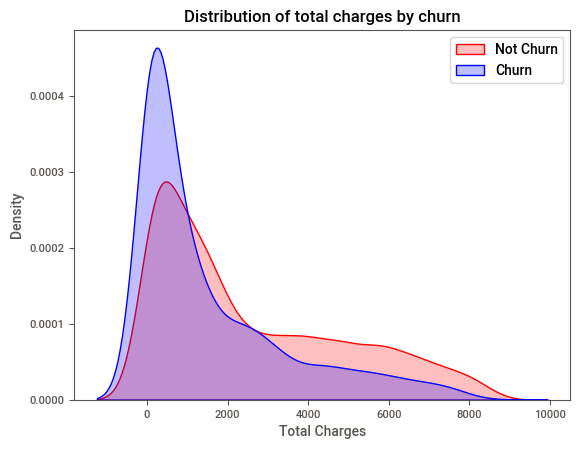

In [82]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill = True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')


Inference: Here we get the surprising insight that as we can see more churn is there with lower charges.

### PaymentMethod and Churn

<Axes: title={'center': 'Relation between PaymentMethod and Churn'}, xlabel='PaymentMethod', ylabel='count'>

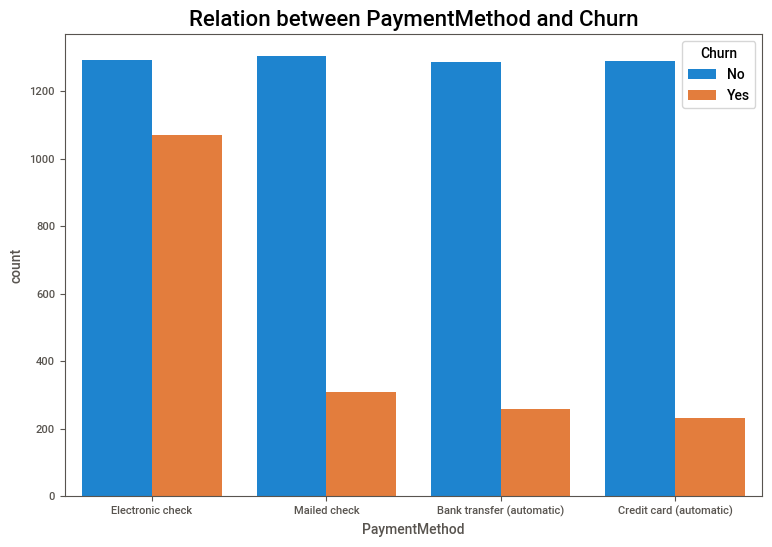

In [83]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(9,6))
plt.title('Relation between PaymentMethod and Churn', fontsize=16)
sns.countplot(data=data,x='PaymentMethod', hue='Churn')

In [84]:
# Counting PaymentMethods where people churned
data[data['Churn']=='Yes']['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Churn')

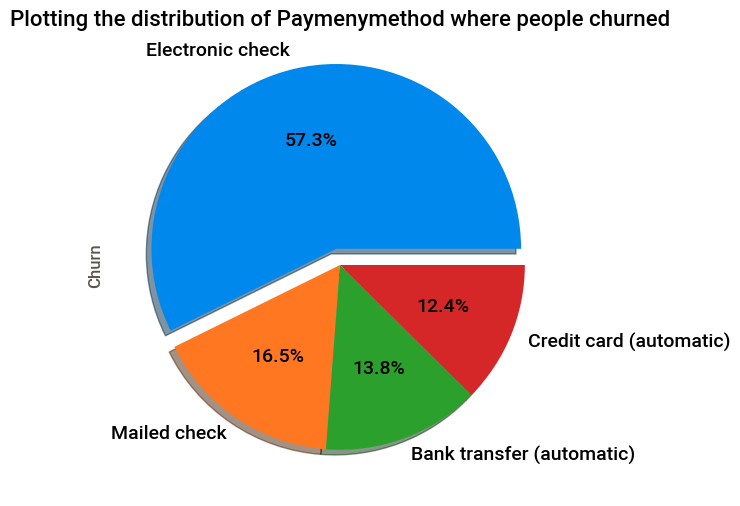

In [85]:
# Plotting the distribution of Paymenymethod where people churned
data[data['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],autopct="%3.1f%%", shadow=True, figsize=(6,6),fontsize=14)
ax.legend(["Electronic check","Mailed check" , 'Bank transfer (automatic) , credit card(automatic)'],loc='upper right')
plt.title('Plotting the distribution of Paymenymethod where people churned', fontsize=16)
plt.ylabel('Churn',fontsize=12)

Text(0, 0.5, 'Churn')

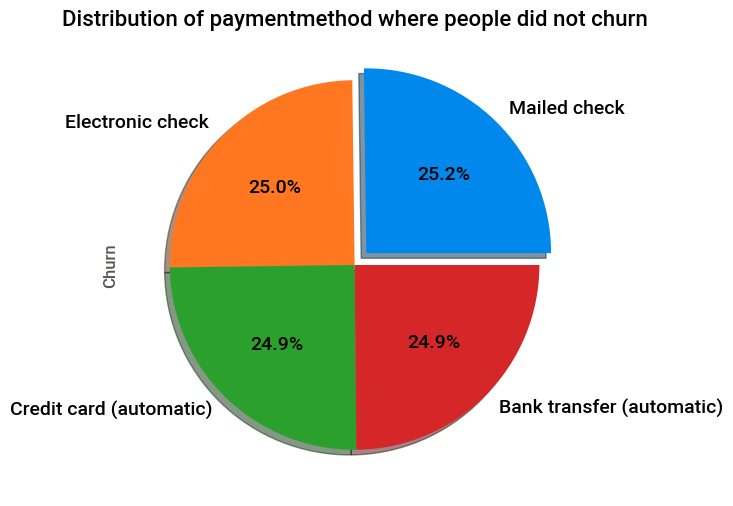

In [86]:
# Distribution of paymentmethod where people did not churn
data[data['Churn']=='No']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],autopct="%3.1f%%",shadow=True,figsize=(6,6),fontsize=14)
plt.title('Distribution of paymentmethod where people did not churn', fontsize=16)
ax.legend(["Electronic check","Mailed check" , 'Bank transfer (automatic) , credit card(automatic)'],loc='upper right')
plt.ylabel('Churn',fontsize=12)

### Subplots representation of the other variables excluding 'Churn', 'TotalCharges', and 'MonthlyCharges' with respect to churn


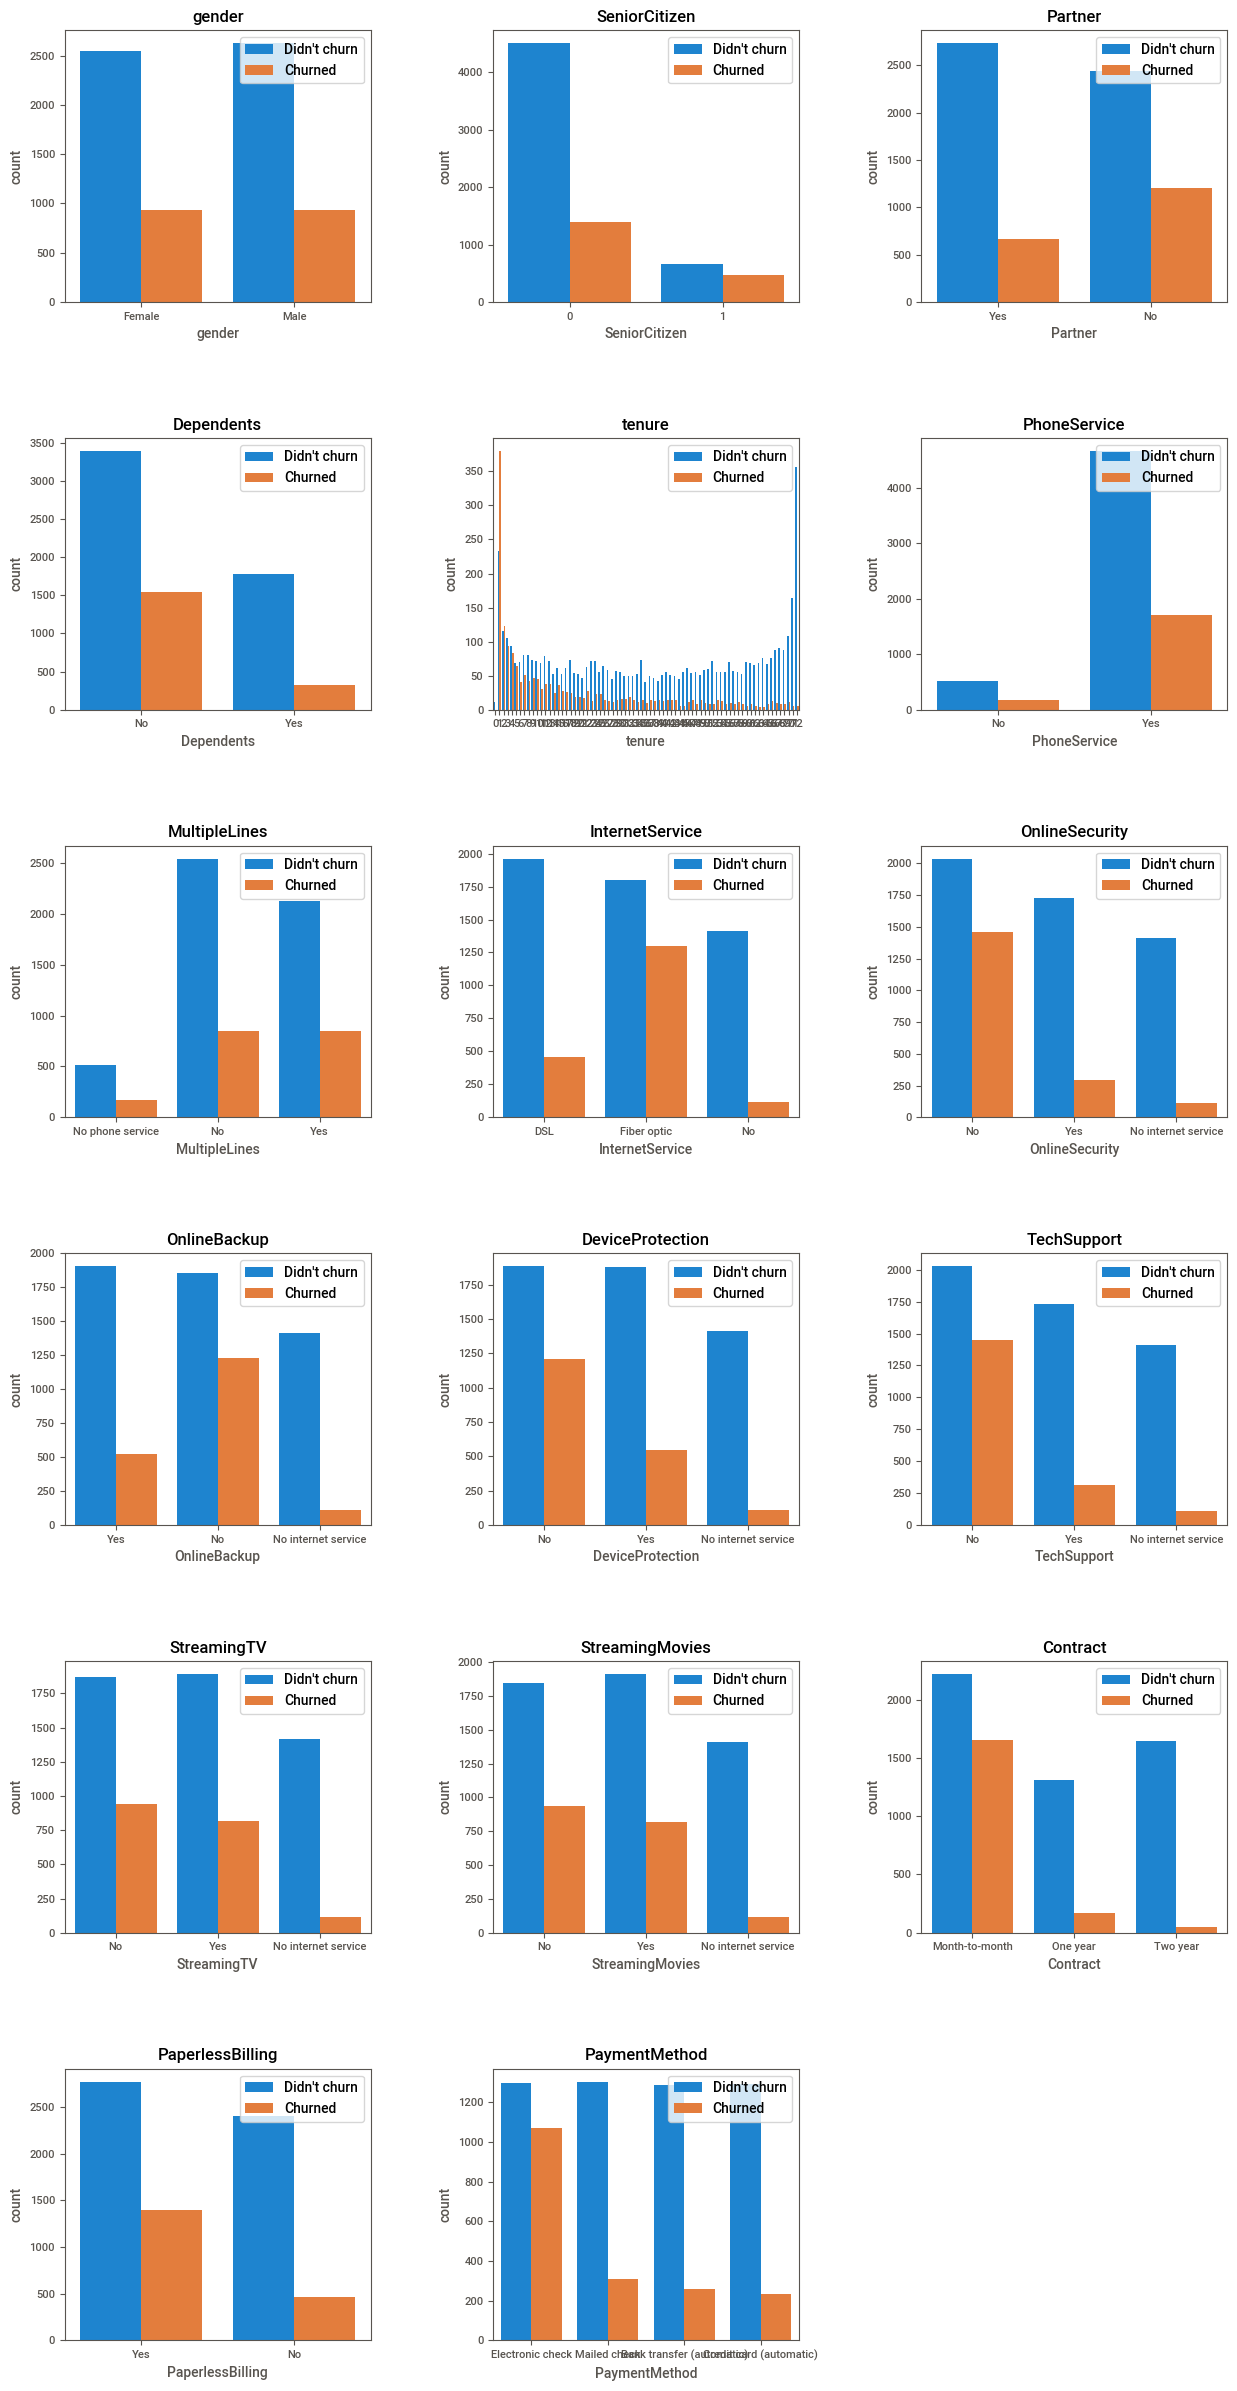

In [87]:
#Subplots rep of the other variables excluding 'Churn', 'TotalCharges', and 'MonthlyCharges' with respect to churn

# Selecting columns excluding 'Churn', 'TotalCharges', and 'MonthlyCharges'
selected_predictors = data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])

# Defining the number of subplots
num_predictors = len(selected_predictors.columns)

# Adjusting the number of subplots per row and calculating the number of rows
subplots_per_row = 3
num_rows = (num_predictors + subplots_per_row - 1) // subplots_per_row

# Setting up a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(15, 5*num_rows))

# Flattening the axes array to iterate through all subplots
axes = axes.flatten()

# Iterating through predictors and plot count plots in subplots
for i, predictor in enumerate(selected_predictors.columns):
    sns.countplot(data=data, x=predictor, hue='Churn', ax=axes[i])
    axes[i].set_title(predictor)
    axes[i].legend(["Didn't churn",'Churned' ], loc='upper right')

# Removing empty subplots
for i in range(num_predictors, num_rows * subplots_per_row):
    fig.delaxes(axes[i])


plt.subplots_adjust(wspace=0.4, hspace=0.5)

plt.show()


## Senior Citizens vs Young People

Text(0.5, 1.0, 'Senior Citizens vs Young People')

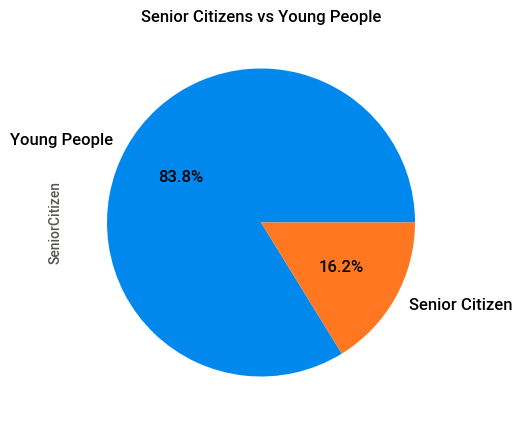

In [88]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), labels = ('Young People' , 'Senior Citizen'),fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Senior Citizens vs Young People', fontsize = 12)

 # Customer Account Information

**1. Tenure Analysis:** Examining the histogram below reveals a diverse distribution in customer tenure with the telecom company. A substantial number of customers have a short tenure of only one month, while a significant portion remains with the company for around 72 months. This variability may be attributed to the influence of different contract terms, suggesting that customer retention or departure could be influenced by the specific terms of their contracts.

Text(0, 0.5, 'Number of Customers')

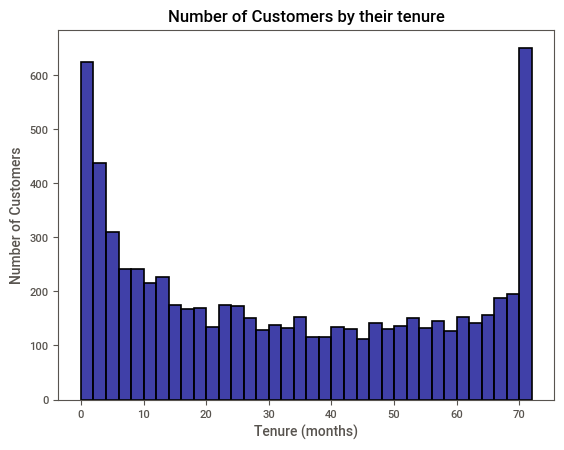

In [89]:

ax = sns.histplot(data['tenure'], bins=int(180/5), color='darkblue',
                  edgecolor='black', linewidth=1.2, kde=False)

ax.set_title('Number of Customers by their tenure')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Number of Customers')

## Contracts
To understand the below graph, lets first look at the number
 of customers by different contracts.

In [90]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Contract Type')

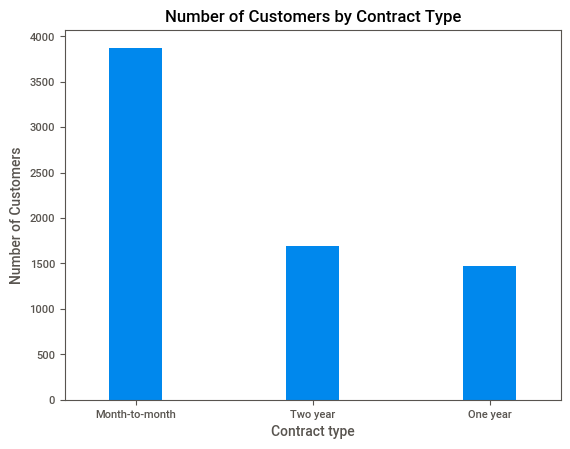

In [91]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Contract type')
ax.set_title('Number of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

*    Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.


## Services
 Let us now look at the distribution of various services used by customers

### distribution of various services used by customers

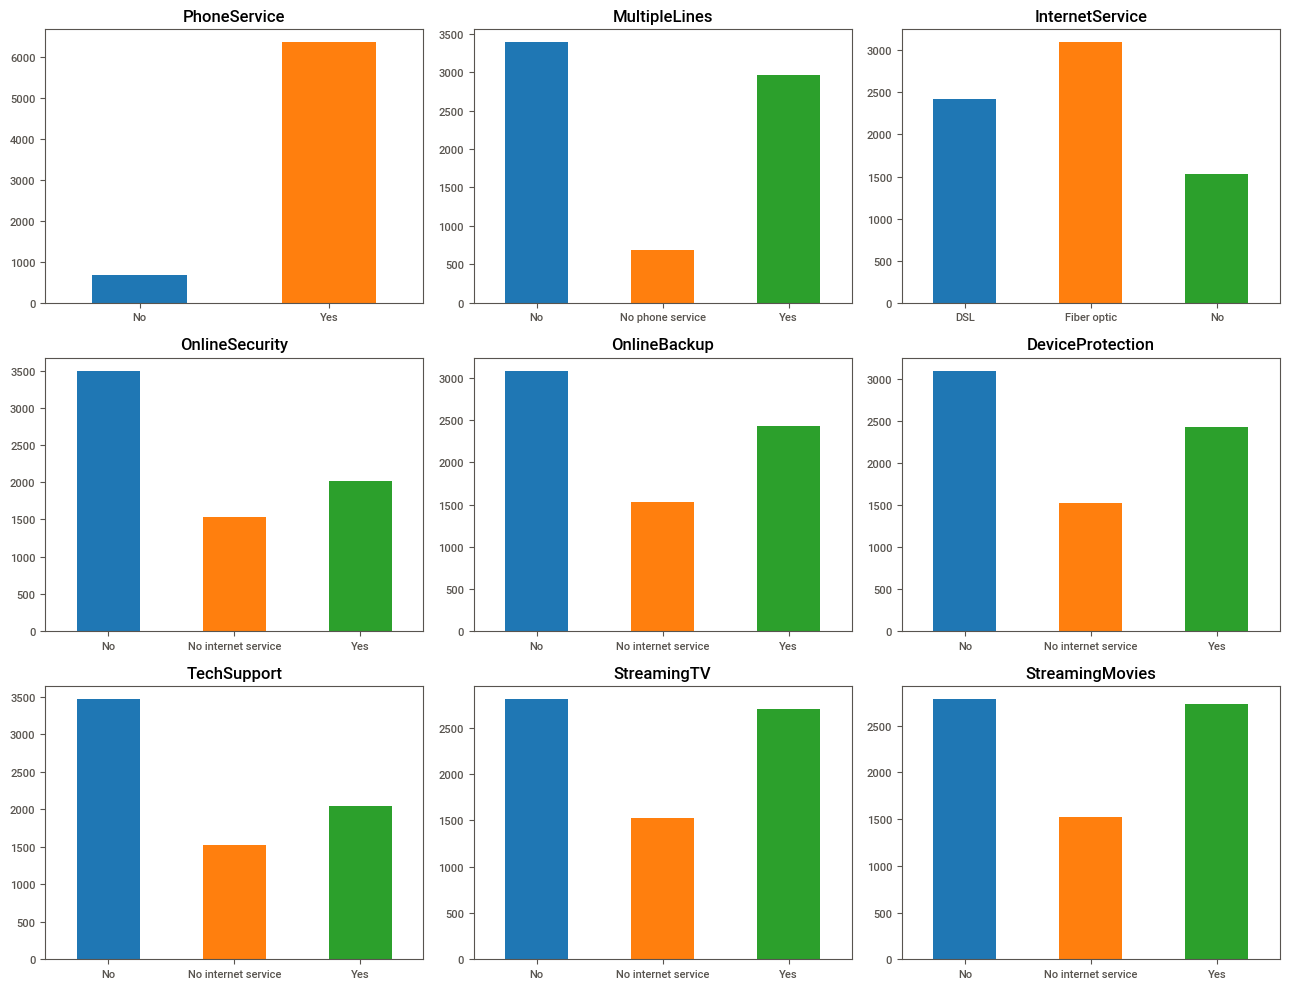

In [92]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

for i, item in enumerate(services):
    row, col = divmod(i, 3)
    unique_values = data[item].unique()
    colors = [f'#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}' for r, g, b in plt.cm.tab10.colors[:len(unique_values)]]  # Convert RGB to hexadecimal

    ax = data[item].value_counts().sort_index().plot(kind='bar', ax=axes[row, col], rot=0, color=colors)
    ax.set_title(item)

plt.tight_layout()
plt.show()




### Relation between PhoneService and TotalCharges with respect to Churn

<Axes: xlabel='PhoneService', ylabel='TotalCharges'>

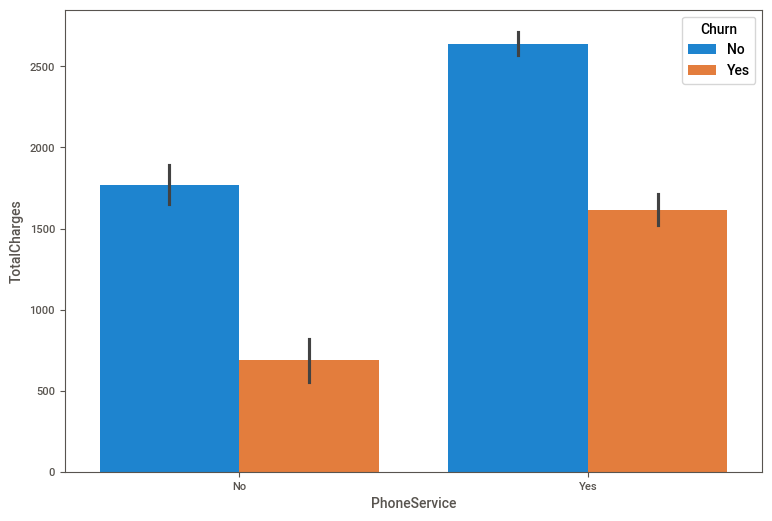

In [93]:
# Relation between PhoneService and TotalCharges with respect to Churn
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
plt.figure(figsize=(9, 6))
sns.barplot(data=data, x='PhoneService', y='TotalCharges', hue='Churn')

### Customers vs Phone service

In [94]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [95]:
# Number of customers who have active PhoneService
print(f"{len(data[data['PhoneService']=='Yes'])} have active PhoneService, which means -->")
# Percentage of customers who have active PhoneService out of the total number of customers
print(f"1. {round((len(data[data['PhoneService'] == 'Yes'])/len(data))*100, 2 )} % customers have Active Phone Service.")
# Percentage of customers with active PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(data[(data['PhoneService']=='Yes') & (data['Churn']=='Yes')]))/(len(data[data['PhoneService']=='Yes']))*100,2)} % of customers with Active Phone Sevice have Churned.")

6361 have active PhoneService, which means -->
1. 90.32 % customers have Active Phone Service.
2. 26.71 % of customers with Active Phone Sevice have Churned.


In [96]:
# Number of customers who have inactive PhoneService
print(f"{len(data[data['PhoneService'] == 'No'])} have inactive PhoneService, which means -->")
# Percentage of customers who have inactive PhoneService out of the total number of customers
print(f"1. {round((len(data[data['PhoneService'] == 'No'])/len(data))*100, 2 )} % customers have Deactivated Phone Service.")
# Percentage of customers with inactive PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(data[(data['PhoneService']=='No') & (data['Churn']=='Yes')]))/(len(data[data['PhoneService']=='Yes']))*100,2)} % of customers with Deactivated Phone Sevice have Churned.")

682 have inactive PhoneService, which means -->
1. 9.68 % customers have Deactivated Phone Service.
2. 2.67 % of customers with Deactivated Phone Sevice have Churned.


<Axes: xlabel='PaymentMethod', ylabel='count'>

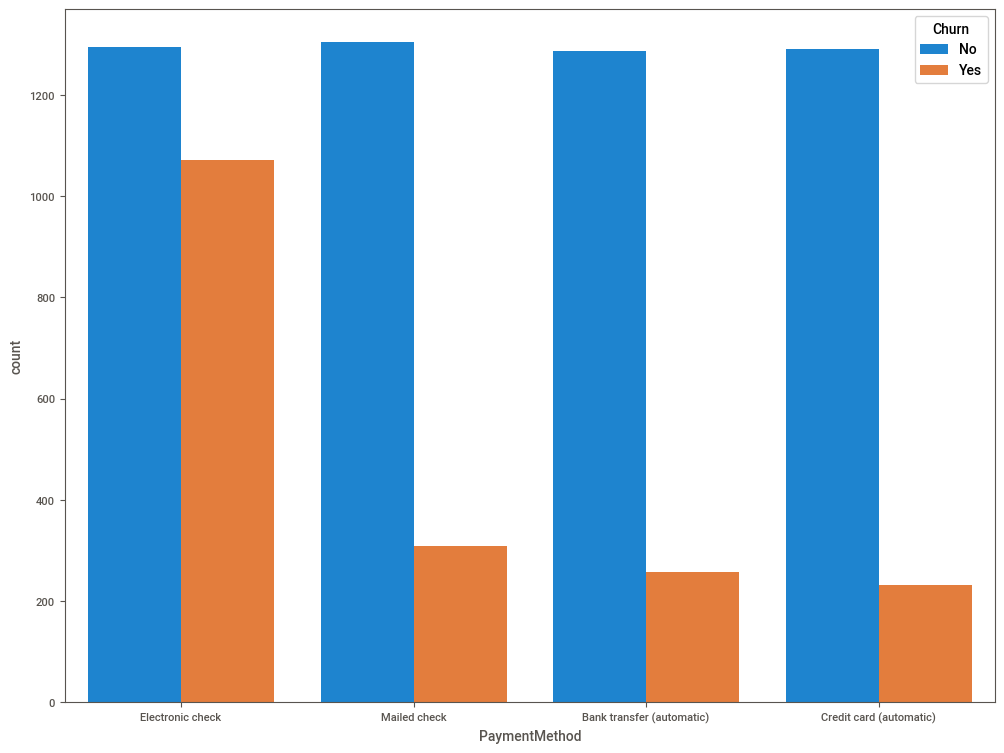

In [97]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(12,9))
sns.countplot(data=data,x='PaymentMethod', hue='Churn')

In [98]:
# Counting PaymentMethods where people churned
data[data['Churn']=='Yes']['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Churn')

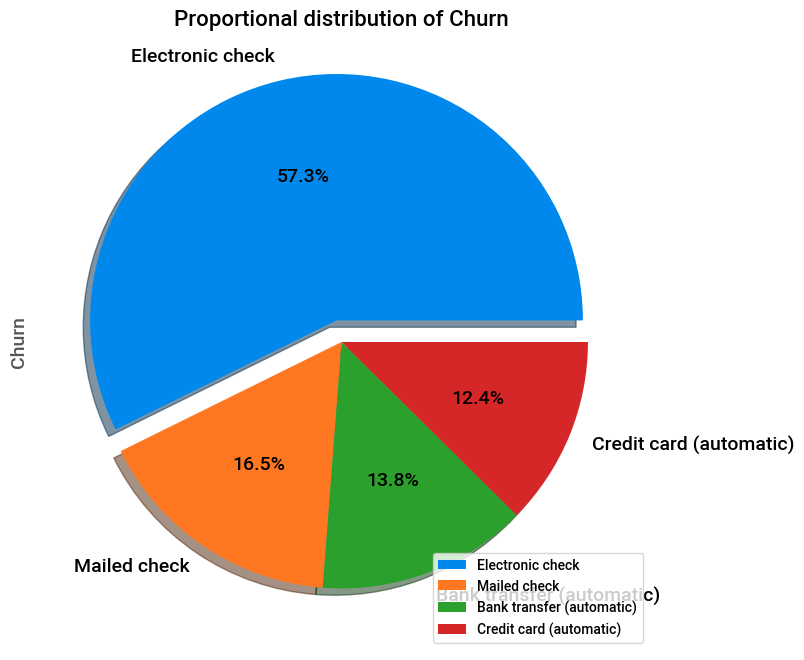

In [99]:
# Plotting the distribution of Paymenymethod where people churned
data[data['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%", shadow=True, figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

##  Relation between monthly and total charges
 Now let's take a quick look at the relation between monthly and total charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

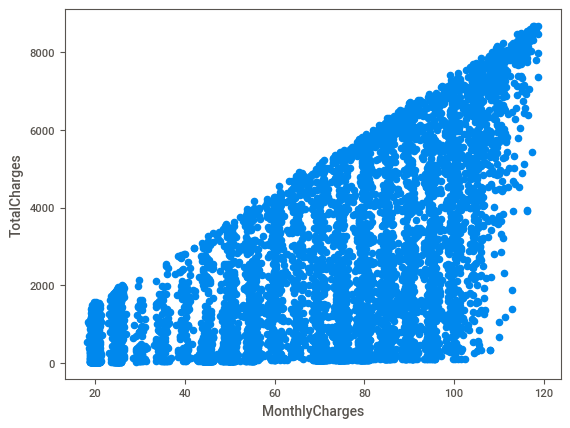

In [100]:
# Scatter plot of monthly vs total charges
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

We will observe that the total charges increases as the monthly bill for a customer increases.

## Converting the predictor variable/Target to a binary numeric variable


In [101]:

#Converting the predictor variable/Target to a binary numeric variable
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
data = pd.get_dummies(data)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0



Here are some key observations on churn analysis derived from this exercise:

*    The use of electronic check methods correlates with higher churn rates.
Monthly customers are more prone to churn due to the absence of contract terms, making them free to discontinue service.
*    Categories lacking online security and tech support experience elevated churn rates.
*    Non-senior citizens exhibit a higher likelihood of churning.

##Descriptive statistics

In [102]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.270398,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

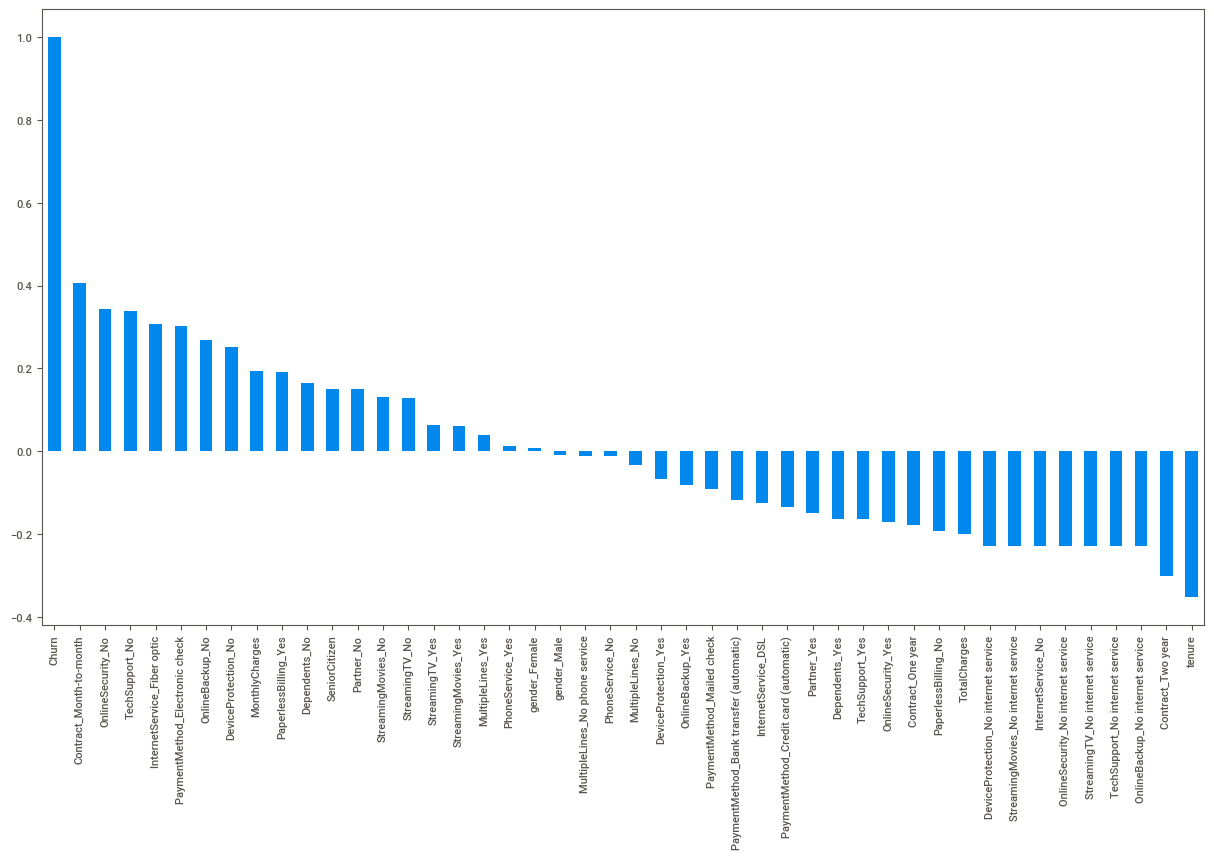

In [103]:
#Plotting the Correlation of "Churn" vs the other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The correlation scale ranges from -1 to 1, with 0 indicating no correlation, positive values indicating positive correlations, and negative values indicating negative correlations. The magnitude of the correlation coefficient reflects the strength of the relationship, while the sign indicates the direction.

The following can be deduced,
*    Churn, Contract_Month_to_month & OnlineSecurity_No are some of the features with a  positive correlation with Churn.

*    Gender and Phone service are some of the features with a  no correlation with Churn.


*    Tenure , contract_Two year , OnlineBackup_No internet service are some of the features with a  negative correlation with Churn.

### Data Exploration

 Looking at the distribution of individual variables at a deeper way.

####a.) Demographics

##### 1. Gender Distribution

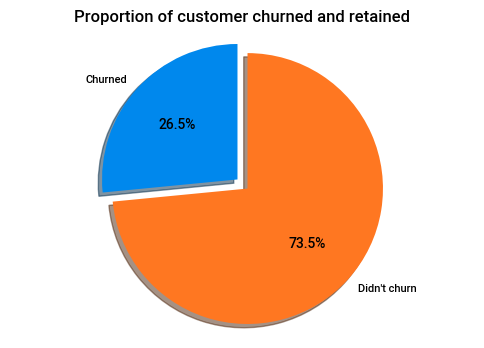

In [104]:
labels = 'Churned', "Didn't churn"
sizes = [data[data['Churn'] == 1].shape[0], data[data['Churn'] == 0].shape[0]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 12)
plt.show()

2. Gender comparison

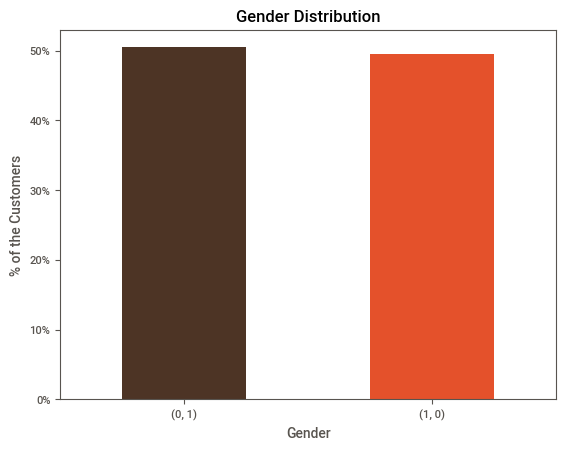

In [105]:
#Bar graph representation of the different genders
colors = ['#4D3425', '#E4512B']
ax = (data[['gender_Female', 'gender_Male']].value_counts() * 100.0 / len(data)).plot(kind='bar',
                                                                                      stacked=True,
                                                                                      rot=0,
                                                                                      color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of the Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

plt.show()


### Income lost due to churning

In [106]:
Total_income_lost = data.groupby('Churn')['TotalCharges'].sum()
Total_income_lost

Churn
0    1.320861e+07
1    2.862927e+06
Name: TotalCharges, dtype: float64

**
*The business lost  due to customer churning is 2,862,927 ***

# Findings

##Demographic Attributes


*    The churn rate of senior citizens is almost double that of young citizens.


*    Customers with a partner churn less than customers with no partner.


*    Similar churn rate are observed for both genders.

## Customer Account Information

*    Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

*    Customers who opted for an electronic check as paying method are more likely to churn.

*    Customers subscribed to paperless billing churn more than those who are not subscribed.

*     The churn rate tends to be larger when monthly charges are high.

*    New customers are more likely to churn.

*    Clients with high total charges are less likely to leave the company.


## Services attributes

*    The percentage of churn for all classes in both independent variables is nearly the same.


*    Clients with online security churn less than those without it.


*    Customers with no tech support tend to churn more often than those with tech support.